In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

U ovom dijelu projekta repliciramo podatke iz članka.

In [2]:
data = pd.read_csv("wdbc.data") #Wisconsin breast cancer database
#print(list(data.columns[:2]))print()#print(list(data.columns[2:12]))print()
#print(list(data.columns[12:22]))print()#print(list(data.columns[22:]))#print()
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Broj benignih i malignih slučajeva: 357 i 212


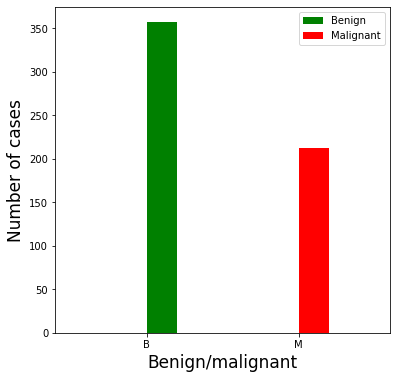

In [3]:
print("Broj benignih i malignih slučajeva:", (data.diagnosis == 'B').sum(), "i", (data.diagnosis == 'M').sum())

fig = plt.figure(figsize = (6,6))

plt.hist(data[data.diagnosis=='B'].diagnosis, color = 'g', label = 'Benign', width=0.2)
plt.hist(data[data.diagnosis=='M'].diagnosis, color = 'r', label = 'Malignant', width=0.2)
#plt.hist(data.groupby('diagnosis'))
#plt.hist(data.diagnosis, bins = 5, range = (-1,2))
plt.xlabel('Benign/malignant', fontsize = 17)
plt.ylabel('Number of cases', fontsize = 17)
plt.legend(loc='best')
plt.show()

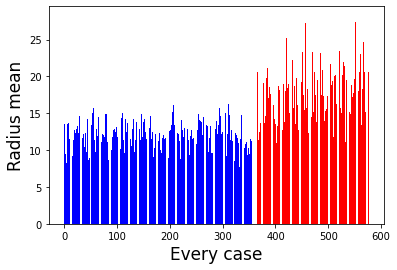

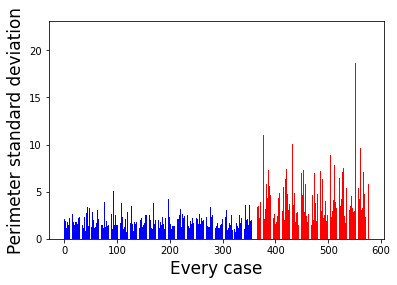

In [4]:
plt.figure()
col_2 = []
for i in range (0,357):
    col_2.append(i)
    
plt.bar(col_2, data[data.diagnosis == 'B'].radius_mean, color='b')
col_2 = []
for i in range (365,577):
    col_2.append(i)
len(col_2)
plt.bar(col_2, data[data.diagnosis == 'M'].radius_mean, color ='r')
plt.xlabel('Every case', fontsize = 17)
plt.ylabel('Radius mean', fontsize = 17)
plt.show()


plt.figure()
col_2 = []
for i in range (0,357):
    col_2.append(i)

plt.bar(col_2, data[data.diagnosis == 'B'].perimeter_se, color='b')
col_2 = []
for i in range (365,577):
    col_2.append(i)
len(col_2)
plt.bar(col_2, data[data.diagnosis == 'M'].perimeter_se, color ='r')
plt.xlabel('Every case', fontsize = 17)
plt.ylabel('Perimeter standard deviation', fontsize = 17)
plt.show()

Prvi graf napravljen je po uzoru na onaj u članku. Graf je napravljen na način da smo primjere podijelili na one sa benignim (plavo) i malignim tumorom (crveno) te smo za svaki primjer ispisali vrijednost značajke 'radius_mean'.<br>
Ono što se može vidjeti na grafu je da su vrijednosti za malignu skupinu puno veće i izraženjije od benigne.<br><br>
Drugi graf prikazuje vrijednosti za značajku 'perimeter_se', kod njega također crvene vrijednosti odskaču ali ne kao u prvom grafu.

U nastavku ćemo se baviti treniranjem i testiranjem određenih modela na ovom skupu podataka. Za bolju generalizaciju bilo bi dobro izbaciti određene značajke. Prvo ćemo pogledati korelacije svih značajki međusobno i izbaciti one koje uzrokuju visoku korelaciju. Potom ćemo izmjeriti korelacije prema ciljnoj varijabli kako bi maknuli one s malim utjecajem na nju.<br><br>

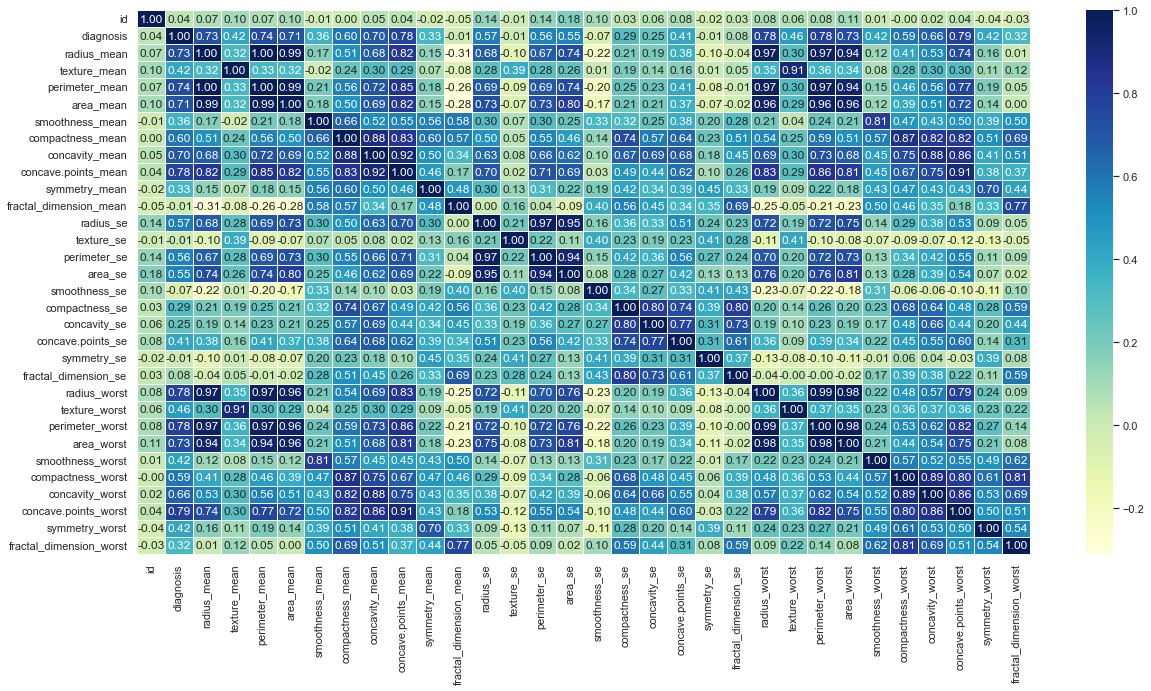

In [5]:
data.diagnosis = data.diagnosis.replace(to_replace="M",value="1").replace(to_replace="B",value="0")
data['diagnosis'] = data['diagnosis'].astype(float)

sns.set(rc={'figure.figsize':(20,10)})
X_numeric = data.loc[:,]
sns.heatmap(X_numeric.corr(),annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()
sns.set(rc={'figure.figsize':(20,10)})

Potpuna toplinska mapa.<br>
Toplinska mapa pokazuje korelaciju između značajki. Korelacija između dvije značajke može biti pozitivna i negativna. Pozitivna znači da, kada jedna značajka raste, raste i druga. Negativna znači da porast jedne vrijednosti uzrokuje opadanje druge. Korelacija ima svoju veličinu. Mi ćemo htjeti izbaciti jednu od onih značajki kod kojih se javlja visoka kolinearnost.<br>

Riješit ćemo se svih korelacija preko 0.90. (izbacujemo 'radius_mean', 'perimeter_mean', 'area_mean', 'texture_worst',
                                        'concave.points_mean', 'radius_se', 'perimeter_se', 'perimeter_worst', 'area_worst').

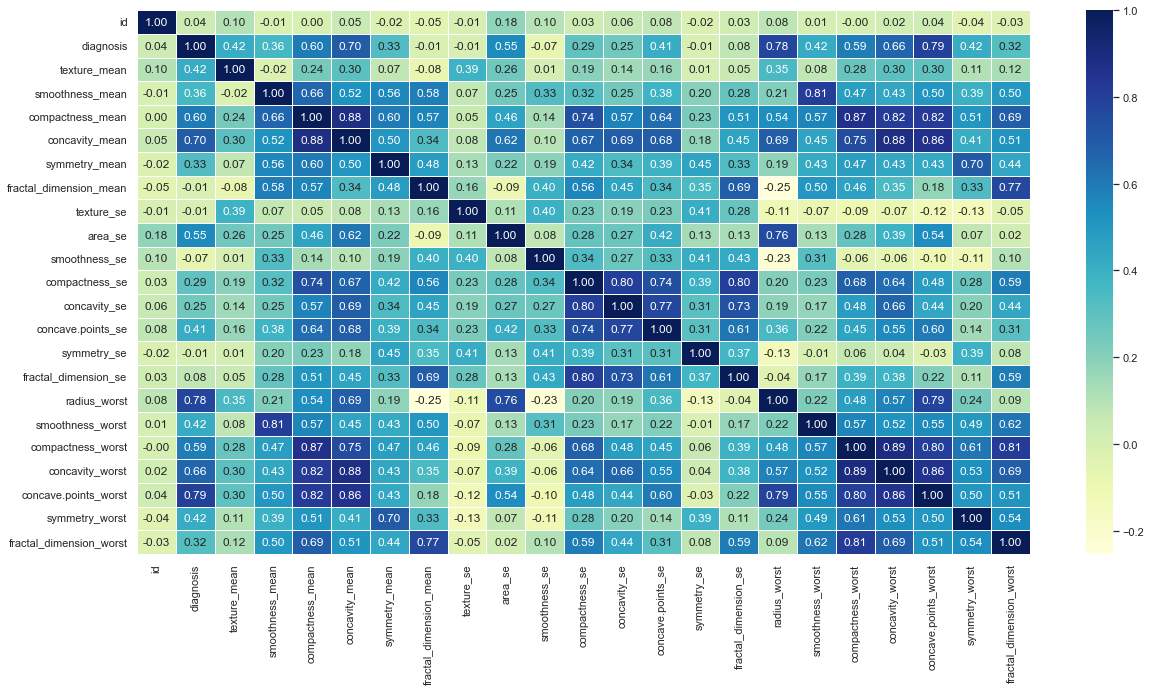

In [6]:
data.diagnosis = data.diagnosis.replace(to_replace="M",value="1").replace(to_replace="B",value="0")
data['diagnosis'] = data['diagnosis'].astype(float)

sns.set(rc={'figure.figsize':(20,10)})
X_data = data.loc[:,~data.columns.isin(['radius_mean', 'perimeter_mean','area_mean', 
                                        'concave.points_mean', 'radius_se', 'perimeter_se'
                                       ,'perimeter_worst', 'area_worst', 'texture_worst'],)]
sns.heatmap(X_data.corr(),annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()
sns.set(rc={'figure.figsize':(20,10)})


Ovako izgleda toplinska mapa bez visoko-koreliranih značajki.
<br>

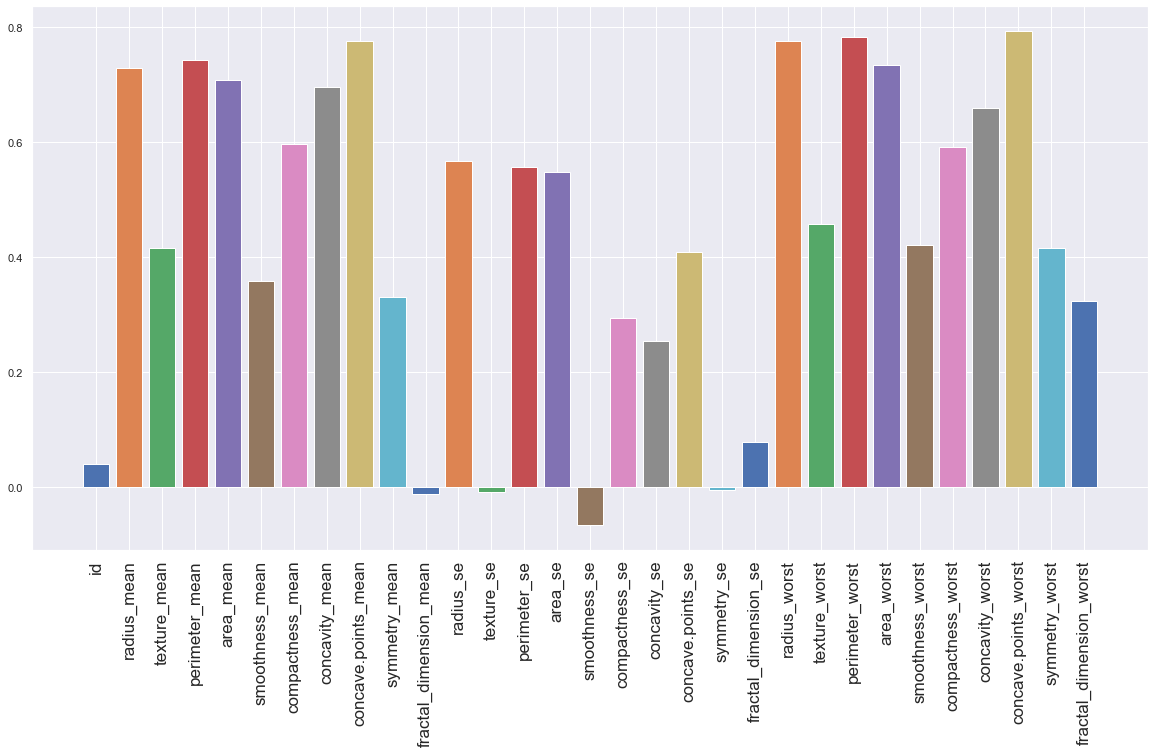

In [7]:
graph_4 = data.corr().diagnosis
graph_4 = graph_4[0:32]
#graph_4b = 
graph_4 = graph_4.drop(labels="diagnosis")
col_4 = data.columns.drop("diagnosis")

fig = plt.figure()
for i in range (graph_4.shape[0]):
    plt.bar(col_4[i], graph_4[i])
plt.xticks(rotation=90, fontsize=17)
plt.show()

Ovaj graf je također iz članka.<br>
Dobar način za provjeriti kolinearnost dijagnoze naspram ostalih značajki. Na stupčastom grafu je lakše i preglednije uočiti kolinearnost, barem za ovoliko malo značajki.<br>
Ovim pokusom, zbog jako niskih vrijednosti prema ciljnoj varijabli, odlučujemo izbaciti značajke 'fractal_dimension_mean', 'texture_mean', 'smoothness_mean', 'symmetry_se', 'fractal_dimension_se'.

In [8]:
X_data = X_data.loc[:,~X_data.columns.isin(
    ['fractal_dimension_mean', 'texture_mean', 'smoothness_mean', 'symmetry_se', 'fractal_dimension_se'],)]

Ovime smo definirali skup koji ćemo koristiti za treniranje i testiranje. Izgleda ovako:

In [9]:
X_data

,id,diagnosis,compactness_mean,concavity_mean,symmetry_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave.points_se,radius_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,0.27760,0.30010,0.2419,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,25.380,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,0.07864,0.08690,0.1812,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,24.990,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,0.15990,0.19740,0.2069,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,23.570,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,0.28390,0.24140,0.2597,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,14.910,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,0.13280,0.19800,0.1809,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,22.540,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1.0,0.11590,0.24390,0.1726,1.2560,158.70,0.010300,0.02891,0.05198,0.02454,25.450,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1.0,0.10340,0.14400,0.1752,2.4630,99.04,0.005769,0.02423,0.03950,0.01678,23.690,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1.0,0.10230,0.09251,0.1590,1.0750,48.55,0.005903,0.03731,0.04730,0.01557,18.980,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1.0,0.27700,0.35140,0.2397,1.5950,86.22,0.006522,0.06158,0.07117,0.01664,25.740,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y_data = X_data.diagnosis
X_data = X_data.loc[:,~X_data.columns.isin(["diagnosis"],)]

In [11]:
X_data.head()

,id,compactness_mean,concavity_mean,symmetry_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave.points_se,radius_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0.27760,0.3001,0.2419,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,25.38,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0.07864,0.0869,0.1812,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,24.99,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0.15990,0.1974,0.2069,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,23.57,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0.28390,0.2414,0.2597,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,14.91,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0.13280,0.1980,0.1809,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,22.54,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y_data.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: diagnosis, dtype: float64

<br><br><br><br><br>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25)

<br><font size="5">SUPPORT VECTOR MACHINE</font>

In [14]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)

print("Model SVM:")
print("  Točnost na skupu za učenje:    ", accuracy_score(pred_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(pred_test, y_test))

Model SVM:
  Točnost na skupu za učenje:     0.6150234741784038
  Točnost na skupu za testiranje: 0.6643356643356644


Rezultati u članku su bolji nego rezultati koje smo dobili.<br>
Probat ćemo pristupiti sa skaliranjem podataka u X_train i X_test skupovima da vidimo hoće li uroditi boljim rezultatima.

In [15]:
#skaliranje
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

L = np.ndarray(shape = (6,3))

In [16]:
svm_scaled = SVC().fit(X_train_transformed, y_train)

svm_train = svm_scaled.predict(X_train_transformed)
svm_test = svm_scaled.predict(X_test_transformed)

print("Model SVM sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(svm_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(svm_test, y_test))

L[0]=[0, accuracy_score(svm_train, y_train), accuracy_score(svm_test, y_test)]

Model SVM sa skaliranim podacima:
  Točnost na skupu za učenje:     0.971830985915493
  Točnost na skupu za testiranje: 0.972027972027972


<br><font size="5">RANDOM FORREST</font>

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train_transformed, y_train)

rf_train = rf.predict(X_train_transformed)
rf_test = rf.predict(X_test_transformed)

print("Model Random Forrest sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(rf_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(rf_test, y_test))

L[1]=[1, accuracy_score(rf_train, y_train), accuracy_score(rf_test, y_test)]

Model Random Forrest sa skaliranim podacima:
  Točnost na skupu za učenje:     1.0
  Točnost na skupu za testiranje: 0.972027972027972


<br><font size="5">NAIVE BAYES</font>

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train_transformed, y_train)

gnb_train = gnb.predict(X_train_transformed)
gnb_test = gnb.predict(X_test_transformed)

print("Model Naive Bayes sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(gnb_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(gnb_test, y_test))

L[2]=[2, accuracy_score(gnb_train, y_train), accuracy_score(gnb_test, y_test)]

Model Naive Bayes sa skaliranim podacima:
  Točnost na skupu za učenje:     0.9154929577464789
  Točnost na skupu za testiranje: 0.9230769230769231


<br><font size="5">DECISION TREE</font>

In [19]:
from sklearn import tree

tree = tree.DecisionTreeClassifier().fit(X_train_transformed, y_train)

tree_train = tree.predict(X_train_transformed)
tree_test = tree.predict(X_test_transformed)

print("Model Decision Tree sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(tree_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(tree_test, y_test))

L[3]=[3, accuracy_score(tree_train, y_train), accuracy_score(tree_test, y_test)]

Model Decision Tree sa skaliranim podacima:
  Točnost na skupu za učenje:     1.0
  Točnost na skupu za testiranje: 0.9300699300699301


<br><font size="5">KNN</font>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train_transformed, y_train)

neigh_train = neigh.predict(X_train_transformed)
neigh_test = neigh.predict(X_test_transformed)

print("Model Knn(n=3) sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(neigh_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(neigh_test, y_test))
acc1 = accuracy_score(neigh_train, y_train)
acc2 = accuracy_score(neigh_test, y_test)

neigh = KNeighborsClassifier(n_neighbors=9).fit(X_train_transformed, y_train)

neigh_train = neigh.predict(X_train_transformed)
neigh_test = neigh.predict(X_test_transformed)

print("Model Knn(n=5) sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(neigh_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(neigh_test, y_test))

if (acc2 < accuracy_score(neigh_test, y_test)):
    acc1 = accuracy_score(neigh_train, y_train)
    acc2 = accuracy_score(neigh_test, y_test)
    
neigh = KNeighborsClassifier(n_neighbors=11).fit(X_train_transformed, y_train)

neigh_train = neigh.predict(X_train_transformed)
neigh_test = neigh.predict(X_test_transformed)

print("Model Knn(n=5) sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(neigh_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(neigh_test, y_test))

if (acc2 < accuracy_score(neigh_test, y_test)):
    acc1 = accuracy_score(neigh_train, y_train)
    acc2 = accuracy_score(neigh_test, y_test)
    
print()
print("Pribilježit ćemo podatke sa najboljim k")
L[4]=[4, acc1, acc2]

Model Knn(n=3) sa skaliranim podacima:
  Točnost na skupu za učenje:     0.960093896713615
  Točnost na skupu za testiranje: 0.958041958041958
Model Knn(n=5) sa skaliranim podacima:
  Točnost na skupu za učenje:     0.9413145539906104
  Točnost na skupu za testiranje: 0.965034965034965
Model Knn(n=5) sa skaliranim podacima:
  Točnost na skupu za učenje:     0.9436619718309859
  Točnost na skupu za testiranje: 0.951048951048951

Pribilježit ćemo podatke sa najboljim k


<br><font size="5">LOGISITIC REGRESSION</font>

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train_transformed, y_train)

logreg_train = logreg.predict(X_train_transformed)
logreg_test = logreg.predict(X_test_transformed)

print("Model LogReg sa skaliranim podacima:")
print("  Točnost na skupu za učenje:    ", accuracy_score(logreg_train, y_train))
print("  Točnost na skupu za testiranje:", accuracy_score(logreg_test, y_test))

L[5]=[5, accuracy_score(logreg_train, y_train), accuracy_score(logreg_test, y_test)]

Model LogReg sa skaliranim podacima:
  Točnost na skupu za učenje:     0.9741784037558685
  Točnost na skupu za testiranje: 0.993006993006993


In [22]:
ln = ["SVM", "rForest", "nBayes", "dTree", "Knn", "logReg"]
L = L[L[:, 2].argsort()]  # sort by test accuracy
#print(L)

print("Poredak rezultata modela. Poredani po točnosti ispitnog skupa.\n")
for i in range (L.shape[0]-1,-1, -1):
    print("{}. {}".format((6-i), ln[int(L[i][0])]))
    print("  Train accuracy: {} \n          Test accuracy: {}\n".format(round(L[i][1],4), round(L[i][2],4)))
    
    
    

Poredak rezultata modela. Poredani po točnosti ispitnog skupa.

1. logReg
  Train accuracy: 0.9742 
          Test accuracy: 0.993

2. rForest
  Train accuracy: 1.0 
          Test accuracy: 0.972

3. SVM
  Train accuracy: 0.9718 
          Test accuracy: 0.972

4. Knn
  Train accuracy: 0.9413 
          Test accuracy: 0.965

5. dTree
  Train accuracy: 1.0 
          Test accuracy: 0.9301

6. nBayes
  Train accuracy: 0.9155 
          Test accuracy: 0.9231



<br><br><font size="3">Nakon provedenog testiranja svih modela dobili smo poprilično visoke rezultate. Naravno, rezultati nisu egzaktno isti kao rezultati u članku. Moja pretpostavka za uzrok tome je prvenstveno što smo dataset podijelili na training i test skup s uključenom opcijom "shuffle", omjer 3:1. <br>
Zatim, kada smo prvi puta trenirali model SVM-a nismo dobili baš perfektan rezultat, zato smo uveli standardno skaliranje nad X skupom podataka. To je rezultiralo tako da je točnost na skupu za ispitivanje "skočila" na 90+ posto.<br>
Zbog dobrog rezultata nastavili smo korisiti skalirane značajke kroz sve testove. Da bi se dobili još bolji rezultati moglo se provesti unakrsnu provjeru za svaki model. Ona bi nam dala do znanja koje parametre smo mogli odabrati bolje za svaki model.<br>Konačno, osim shuffle-a i optimizacije parametara, treći razlog zbog kojeg smo dobili drugačije rezultate je koje značajke uzimamo u obzir a koje izbacujemo.
<br><br></font>